# Getting locations

In [3]:
import geopandas as gpd
import os

In [ ]:

# Attempting to read the user's GeoJSON file and provide an overview
file_path = '/Users/isaacfernandez/CaliWildfire/archive (3)/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson'

try:
    # Load the GeoJSON file
    gdf = gpd.read_file(file_path)
    
    # Provide an overview of the data
    overview = {
        'Number of records': len(gdf),
        'CRS (Coordinate Reference System)': gdf.crs,
        'Number of columns': len(gdf.columns),
        'Column names': gdf.columns.tolist(),
        'First few rows': gdf.head()
    }
    overview

except Exception as e:
    str(e)

In [5]:
overview

{'Number of records': 100230,
 'CRS (Coordinate Reference System)': <Projected CRS: EPSG:3857>
 Name: WGS 84 / Pseudo-Mercator
 Axis Info [cartesian]:
 - X[east]: Easting (metre)
 - Y[north]: Northing (metre)
 Area of Use:
 - name: World between 85.06°S and 85.06°N.
 - bounds: (-180.0, -85.06, 180.0, 85.06)
 Coordinate Operation:
 - name: Popular Visualisation Pseudo-Mercator
 - method: Popular Visualisation Pseudo Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 'Number of columns': 45,
 'Column names': ['OBJECTID',
  'DAMAGE',
  'STREETNUMBER',
  'STREETNAME',
  'STREETTYPE',
  'STREETSUFFIX',
  'CITY',
  'STATE',
  'ZIPCODE',
  'CALFIREUNIT',
  'COUNTY',
  'COMMUNITY',
  'BATTALION',
  'INCIDENTNAME',
  'INCIDENTNUM',
  'INCIDENTSTARTDATE',
  'HAZARDTYPE',
  'WHEREFIRESTARTEDONSTRUCTURE',
  'WHATDIDFIRESTARTFROM',
  'DEFENSIVEACTIONS',
  'STRUCTURETYPE',
  'STRUCTURECATEGORY',
  'NUMBEROFUNITPERSTRUCTURE',
  'NOOUTBUILDINGSDAMA

## Plotting damage

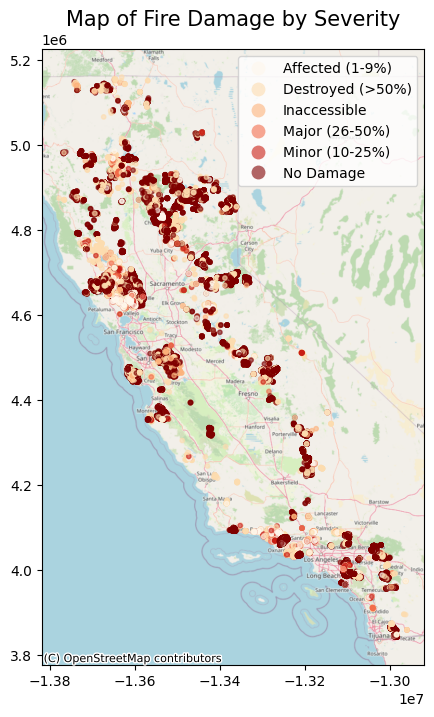

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the GeoJSON file
gdf = gpd.read_file('/Users/isaacfernandez/CaliWildfire/archive (3)/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson')

# Convert to GeoDataFrame using longitude and latitude
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['Longitude'], gdf['Latitude']), crs="EPSG:4326")

# Project to Web Mercator for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plotting the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='DAMAGE', legend=True, cmap='OrRd', markersize=10, alpha=0.6)

# Correct provider reference
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Using OpenStreetMap basemap
ax.set_title('Map of Fire Damage by Severity', fontsize=15)
plt.show()



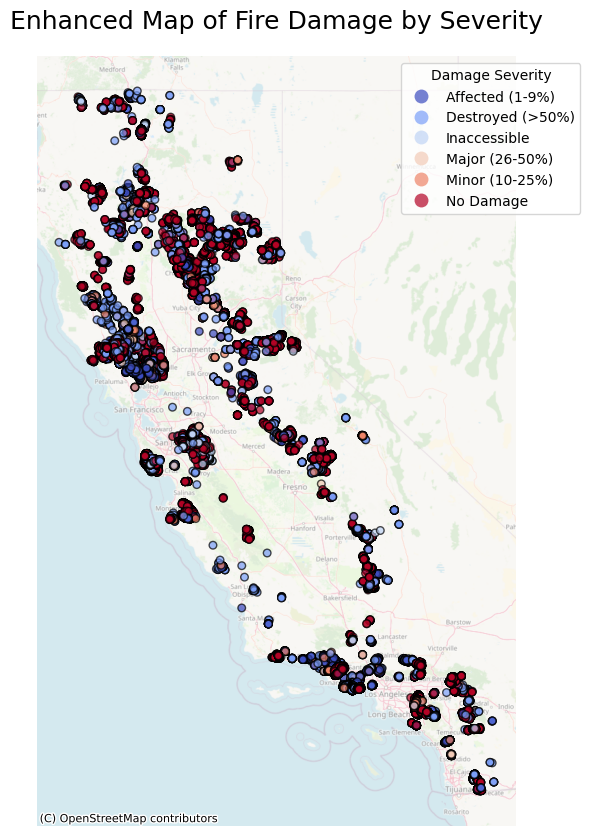

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the GeoJSON file
gdf = gpd.read_file('/Users/isaacfernandez/CaliWildfire/archive (3)/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson')

# Convert to GeoDataFrame using longitude and latitude
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['Longitude'], gdf['Latitude']), crs="EPSG:4326")

# Project to Web Mercator for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plotting the data with enhancements
fig, ax = plt.subplots(figsize=(14, 10))
gdf.plot(ax=ax, column='DAMAGE', legend=True, cmap='coolwarm', markersize=30, alpha=0.7, edgecolor='black')

# Adding the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

# Customize the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 1))  # Move the legend outside the map
leg.set_title("Damage Severity")

# Title and axes formatting
ax.set_title('Enhanced Map of Fire Damage by Severity', fontsize=18, pad=20)
ax.set_axis_off()  # Remove axis for a cleaner look
plt.show()


In [18]:
# Displaying available providers from contextily
import contextily as ctx

# List all available providers
available_providers = dir(ctx.providers)
available_providers


['AzureMaps',
 'BaseMapDE',
 'BasemapAT',
 'CartoDB',
 'CyclOSM',
 'Esri',
 'FreeMapSK',
 'Gaode',
 'GeoportailFrance',
 'HERE',
 'HEREv3',
 'HikeBike',
 'Jawg',
 'JusticeMap',
 'MapBox',
 'MapTiler',
 'MapTilesAPI',
 'MtbMap',
 'NASAGIBS',
 'NLS',
 'OPNVKarte',
 'OneMapSG',
 'OpenAIP',
 'OpenFireMap',
 'OpenRailwayMap',
 'OpenSeaMap',
 'OpenSnowMap',
 'OpenStreetMap',
 'OpenTopoMap',
 'OpenWeatherMap',
 'OrdnanceSurvey',
 'SafeCast',
 'Stadia',
 'Strava',
 'SwissFederalGeoportal',
 'Thunderforest',
 'TomTom',
 'TopPlusOpen',
 'USGS',
 'WaymarkedTrails',
 'nlmaps']